# Simple autoencoder

## Prepare Autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# same model as above, but separate the encoder from the decoder
# We are doing this to visualize the input below at each stage

# just the encoder part from the model above
encoder = Model(input_img, encoded)

# just the decoder part from the model above
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # get the last layer of the autoencoder above
decoder = Model(encoded_input, decoder_layer(encoded_input))

`Model` simply brings the individual parts of the model together. When we finish fitting the model in the `autoencoder` instance, we have trained the parameters of neurons in the `encoded` layer. We can then use this trained layer to construct a separate model by initialized another `Model` instance with the input and layers we want as arguements.

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Prepare Data

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Fit Model

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

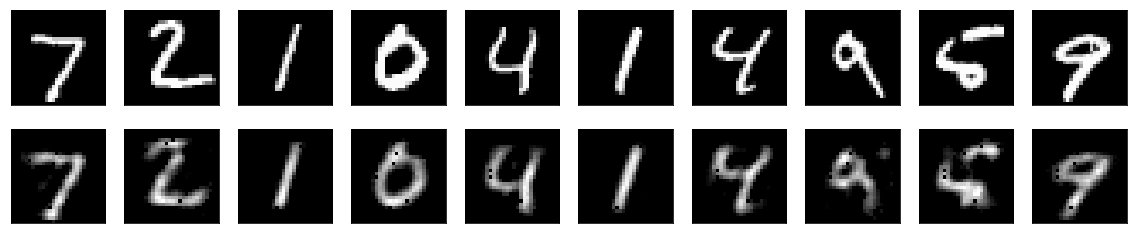

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()